In [ ]:
!pip3 install librosa -U
from librosa.core import load as ld_wav
from librosa.feature import delta,chroma_stft
import librosa.feature as ft_extraction
import scipy.io.wavfile as wav
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import librosa.display as disp
import pandas as pd
import librosa
from sklearn.metrics.pairwise import euclidean_distances
from operator import itemgetter
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib
import graph_tool as gt
from graph_tool.all import *
drive.mount('/content/drive')

Requirement already up-to-date: librosa in /usr/local/lib/python3.6/dist-packages (0.8.0)
Executing: /tmp/apt-key-gpghome.lzrE27nt2f/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute

# Data Extraction

In [ ]:
!ls "/content/drive/My Drive/Redes Complexas/Trabalho 2"

beethoven_f_r_elise_piano_version_V5nh_HIByoK-gucZUpSc.mp3
RedesComplexas_Trabalho2.ipynb


In [ ]:
# directory where we your .wav files are
directoryName = "/content/drive/My Drive/Redes Complexas/Trabalho 2/" # put your own directory here


In [ ]:
(sig,rate) = ld_wav(directoryName +'beethoven_f_r_elise_piano_version_V5nh_HIByoK-gucZUpSc.mp3')
spectogram = np.abs(librosa.stft(sig,n_fft=512,hop_length=512//4))
spectogram.shape

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(257, 30177)

[Text(0.5, 1.0, 'Spectrogram')]

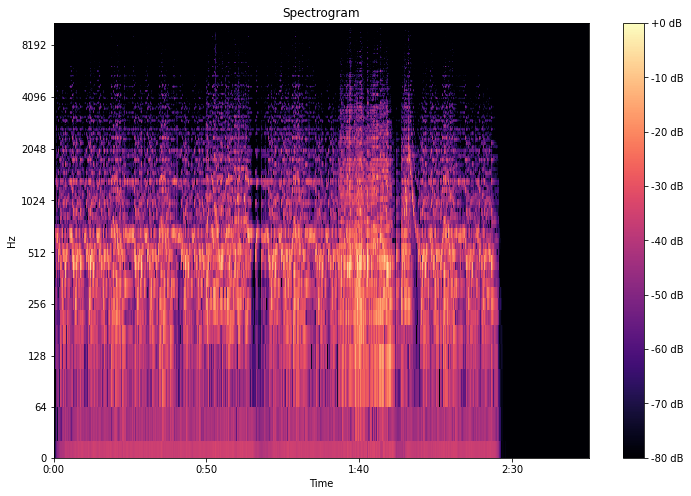

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
img = disp.specshow(librosa.amplitude_to_db(spectogram,ref=np.max), 
                    x_axis='time',
                    y_axis='log',
                    sr=rate,
                    fmax=8000, ax=ax,hop_length=512//4)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Spectrogram')

In [ ]:
 chroma = chroma_stft(S=spectogram,sr=rate)
 chroma.shape

(12, 30177)

[Text(0.5, 1.0, 'Chromagram')]

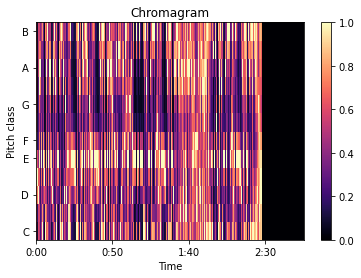

In [ ]:
fig, ax = plt.subplots()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax,hop_length=512//4)

fig.colorbar(img, ax=ax)

ax.set(title='Chromagram')

In [ ]:
notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
len(notes)

12

In [ ]:
notas_index = np.argmax(chroma,axis=0)
graph = {}
for note in range(len(notes)):
  graph[note] = dict()
prev = -1
curr = -1
count = 0
for i in notas_index: 
  if count == 0:
    prev = i
    count += 1
  else:
    curr = i
    if curr not in graph[prev]:
      graph[prev][curr] = 1
    else:
      graph[prev][curr] += 1
    prev = curr
    count += 1

In [ ]:
graph

{0: {0: 7732,
  1: 96,
  2: 54,
  3: 8,
  4: 99,
  5: 18,
  6: 6,
  7: 13,
  8: 38,
  9: 40,
  10: 29,
  11: 98},
 1: {0: 106,
  1: 303,
  2: 22,
  3: 5,
  4: 42,
  5: 11,
  7: 7,
  8: 18,
  9: 14,
  10: 4,
  11: 6},
 2: {0: 66,
  1: 27,
  2: 1517,
  3: 37,
  4: 36,
  5: 66,
  6: 5,
  7: 18,
  8: 10,
  9: 13,
  10: 8,
  11: 26},
 3: {0: 3,
  1: 6,
  2: 36,
  3: 1386,
  4: 117,
  5: 5,
  6: 2,
  7: 3,
  8: 5,
  9: 4,
  10: 3,
  11: 7},
 4: {0: 95,
  1: 43,
  2: 48,
  3: 110,
  4: 6029,
  5: 65,
  6: 2,
  7: 4,
  8: 27,
  9: 51,
  10: 8,
  11: 54},
 5: {0: 18,
  1: 12,
  2: 60,
  3: 6,
  4: 68,
  5: 728,
  6: 12,
  7: 8,
  8: 7,
  9: 4,
  10: 5,
  11: 8},
 6: {0: 4, 2: 4, 3: 2, 4: 6, 5: 16, 6: 63, 7: 5, 8: 3, 9: 2, 11: 4},
 7: {0: 9,
  1: 3,
  2: 11,
  3: 2,
  4: 6,
  5: 13,
  6: 7,
  7: 454,
  8: 15,
  9: 10,
  10: 6,
  11: 16},
 8: {0: 36,
  1: 24,
  2: 14,
  3: 7,
  4: 25,
  5: 2,
  6: 2,
  7: 12,
  8: 765,
  9: 66,
  10: 7,
  11: 18},
 9: {0: 33,
  1: 10,
  2: 14,
  3: 4,
  4: 41,
  

In [ ]:
edge_list = []
for source in list(graph.keys()):
  for dest in list(graph[source].keys()):
    edge_list.append((source,dest,graph[source][dest]))

In [ ]:
edge_list

[(0, 0, 7732),
 (0, 3, 8),
 (0, 1, 96),
 (0, 10, 29),
 (0, 4, 99),
 (0, 8, 38),
 (0, 9, 40),
 (0, 2, 54),
 (0, 11, 98),
 (0, 7, 13),
 (0, 5, 18),
 (0, 6, 6),
 (1, 0, 106),
 (1, 1, 303),
 (1, 4, 42),
 (1, 9, 14),
 (1, 2, 22),
 (1, 11, 6),
 (1, 5, 11),
 (1, 8, 18),
 (1, 7, 7),
 (1, 10, 4),
 (1, 3, 5),
 (2, 7, 18),
 (2, 2, 1517),
 (2, 1, 27),
 (2, 0, 66),
 (2, 4, 36),
 (2, 5, 66),
 (2, 11, 26),
 (2, 3, 37),
 (2, 10, 8),
 (2, 9, 13),
 (2, 6, 5),
 (2, 8, 10),
 (3, 11, 7),
 (3, 3, 1386),
 (3, 4, 117),
 (3, 1, 6),
 (3, 2, 36),
 (3, 5, 5),
 (3, 10, 3),
 (3, 9, 4),
 (3, 8, 5),
 (3, 7, 3),
 (3, 6, 2),
 (3, 0, 3),
 (4, 5, 65),
 (4, 4, 6029),
 (4, 3, 110),
 (4, 11, 54),
 (4, 8, 27),
 (4, 9, 51),
 (4, 0, 95),
 (4, 1, 43),
 (4, 2, 48),
 (4, 7, 4),
 (4, 10, 8),
 (4, 6, 2),
 (5, 6, 12),
 (5, 5, 728),
 (5, 4, 68),
 (5, 2, 60),
 (5, 11, 8),
 (5, 0, 18),
 (5, 7, 8),
 (5, 9, 4),
 (5, 1, 12),
 (5, 10, 5),
 (5, 3, 6),
 (5, 8, 7),
 (6, 4, 6),
 (6, 6, 63),
 (6, 5, 16),
 (6, 11, 4),
 (6, 2, 4),
 (6, 8, 3),
 (6

In [ ]:
g = Graph()
eweight = g.new_ep("double")
g.add_edge_list(edge_list, eprops=[eweight])
v_prop = g.new_vertex_property("string")
for note in list(graph.keys()):
  v_prop[note] = notes[note]


In [ ]:
deg = g.degree_property_map("in")
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)
ebet = betweenness(g)[1]
ebet.a /= ebet.a.max() / 10.
eorder = ebet.copy()
eorder.a *= -1
pos = sfdp_layout(g)
control = g.new_edge_property("vector<double>")
for e in g.edges():
    d = np.sqrt(sum((pos[e.source()].a - pos[e.target()].a) ** 2)) / 5
    control[e] = [0.3, d, 0.7, d]
gt.draw.graph_draw(g,pos=pos, vertex_size=deg, vertex_fill_color=pageRank, vorder=deg,
              edge_color=ebet, eorder=eorder, edge_pen_width=ebet,
              edge_control_points=control, # some curvy edges
              output="graph-draw.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd669132198, at 0x7fd668ef9b38>

In [ ]:
pageRank = gt.centrality.pagerank(g,weight=eweight)
deg_out = g.degree_property_map("out")
deg_out.a = 4 * (np.sqrt(deg_out.a) * 0.5 + 0.4)
for i in range(12):
  print(notes[i],pageRank[i])

C 0.1617973067194782
C# 0.0369343713432123
D 0.08487189047929536
D# 0.07288462657498891
E 0.15106581846198208
F 0.06717924471028575
F# 0.028714458296928688
G 0.05696103408078691
G# 0.0607889473431215
A 0.12058898195600495
A# 0.046047657147101656
B 0.11216566288681382


In [ ]:
.get_array()

PropertyArray([7.732e+03, 8.000e+00, 9.600e+01, 2.900e+01, 9.900e+01,
               3.800e+01, 4.000e+01, 5.400e+01, 9.800e+01, 1.300e+01,
               1.800e+01, 6.000e+00, 1.060e+02, 3.030e+02, 4.200e+01,
               1.400e+01, 2.200e+01, 6.000e+00, 1.100e+01, 1.800e+01,
               7.000e+00, 4.000e+00, 5.000e+00, 1.800e+01, 1.517e+03,
               2.700e+01, 6.600e+01, 3.600e+01, 6.600e+01, 2.600e+01,
               3.700e+01, 8.000e+00, 1.300e+01, 5.000e+00, 1.000e+01,
               7.000e+00, 1.386e+03, 1.170e+02, 6.000e+00, 3.600e+01,
               5.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 3.000e+00,
               2.000e+00, 3.000e+00, 6.500e+01, 6.029e+03, 1.100e+02,
               5.400e+01, 2.700e+01, 5.100e+01, 9.500e+01, 4.300e+01,
               4.800e+01, 4.000e+00, 8.000e+00, 2.000e+00, 1.200e+01,
               7.280e+02, 6.800e+01, 6.000e+01, 8.000e+00, 1.800e+01,
               8.000e+00, 4.000e+00, 1.200e+01, 5.000e+00, 6.000e+00,
               7.000